In [1]:
import os
os.chdir(os.getcwd() + '/..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from iss.tools.config import Config
from iss.models.SimpleAutoEncoder import SimpleAutoEncoder
from iss.models.ModelTrainer import ModelTrainer
import pandas as pd
import datetime as dt
import time
import numpy as np

Using TensorFlow backend.


In [28]:
cfg = Config()

## Model

In [5]:
model = SimpleAutoEncoder(cfg.get('models')['simple'])

In [6]:
model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 45, 80, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10800)             0         
_________________________________________________________________
enc_1 (Dense)                (None, 2000)              21602000  
_________________________________________________________________
enc_2 (Dense)                (None, 100)               200100    
_________________________________________________________________
enc_3 (Dense)                (None, 30)                3030      
_________________________________________________________________
dec_1 (Dense)                (None, 100)               3100      
_________________________________________________________________
dec_2 (Dense)                (None, 2000)              202000    
__________

In [7]:
model.save()

## Collection Manager

In [8]:
from iss.data.CollectionManager import CollectionManagerFromDirectory

In [9]:
collection = CollectionManagerFromDirectory(config = cfg)

## Data Loader

In [19]:
from iss.models.DataLoader import ImageDataGeneratorWrapper

In [20]:
data_loader = ImageDataGeneratorWrapper(cfg)

Found 9537 images belonging to 1 classes.
Found 2725 images belonging to 1 classes.


## Model Trainer

In [29]:
trainer = ModelTrainer(model, data_loader, cfg.get('models')['simple'])

Epoch 1/2
10/10 [==============================] - 30s 3s/step - loss: 4.0362 - val_loss: 3.8519
ok


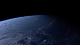

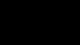

Epoch 2/2
10/10 [==============================] - 20s 2s/step - loss: 3.9729 - val_loss: 3.9454
ok


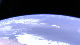

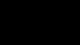

In [30]:
trainer.train()

## Prediction

In [31]:
from iss.tools.tools import Tools 

In [33]:
sample = data_loader.get_test_generator().next()[0][1]

In [34]:
prediction = model.predict_one(x = sample)

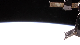

In [35]:
Tools.display_one_picture_scaled(sample)

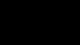

In [36]:
Tools.display_index_picture_scaled(prediction)

In [37]:
prediction

array([[[[  9.29346570e-05,   8.98255530e-05,   9.10840463e-05],
         [  9.24957130e-05,   8.69057039e-05,   9.48583547e-05],
         [  9.25923814e-05,   9.37460136e-05,   9.16876670e-05],
         ..., 
         [  9.72924754e-05,   9.01218809e-05,   9.07215144e-05],
         [  8.95589183e-05,   9.17836296e-05,   9.02524989e-05],
         [  9.32235635e-05,   9.47016451e-05,   9.11756142e-05]],

        [[  9.44539206e-05,   9.08145885e-05,   9.35679709e-05],
         [  9.06047280e-05,   8.93754986e-05,   9.36847937e-05],
         [  9.12203177e-05,   9.15631317e-05,   9.22772961e-05],
         ..., 
         [  9.03476830e-05,   9.41506369e-05,   9.19400118e-05],
         [  9.54698262e-05,   9.56243603e-05,   9.01497115e-05],
         [  9.08325746e-05,   9.22526378e-05,   9.67690648e-05]],

        [[  9.75354778e-05,   9.62107879e-05,   9.33410265e-05],
         [  9.07929862e-05,   9.04788467e-05,   9.17322686e-05],
         [  9.03079417e-05,   9.44491185e-05,   9.320974